#   Question 1

#   Sentimental Analysis Elon Musk

In [1]:
import numpy as np
import pandas as pd
import string 
import spacy
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from wordcloud import WordCloud
%matplotlib inline

In [2]:
elon_musk = pd.read_csv("Elon_musk.csv",encoding ='cp1252')
elon_musk

Unnamed: 0                                               Text
0              1                             @kunalb11 I’m an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [3]:
elon_musk = elon_musk.drop("Unnamed: 0", axis=1)
elon_musk

Text
0                                @kunalb11 I’m an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

###  Positive Words 

In [4]:
positive = pd.read_csv("positive-words.txt",encoding='cp1252',error_bad_lines=False,sep='\n',header=None)
positive

0
0     ;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...
1                                                    ; 
2                           ; Opinion Lexicon: Positive
3                                                     ;
4     ; This file contains a list of POSITIVE opinio...
...                                                 ...
2035                                           youthful
2036                                               zeal
2037                                             zenith
2038                                               zest
2039                                              zippy

[2040 rows x 1 columns]

In [11]:
positive = positive.drop(labels=range(0,35),axis=0).reset_index(drop=True)

In [12]:
positive["values"] = 1
positive

0  values
0     adorable       1
1        adore       1
2       adored       1
3       adorer       1
4      adoring       1
...        ...     ...
1965  youthful       1
1966      zeal       1
1967    zenith       1
1968      zest       1
1969     zippy       1

[1970 rows x 2 columns]

###   Negative Words

In [13]:
negative = pd.read_csv("negative-words.txt",encoding='cp1252',header=None,error_bad_lines=False,sep="\n")

In [14]:
negative["values"] = -1
negative

0  values
0       abnormal      -1
1        abolish      -1
2     abominable      -1
3     abominably      -1
4      abominate      -1
...          ...     ...
4776        zaps      -1
4777      zealot      -1
4778     zealous      -1
4779   zealously      -1
4780      zombie      -1

[4781 rows x 2 columns]

###   Stop Words

In [15]:
stop_text = pd.read_csv("stop.txt",encoding='cp1252',header=None,error_bad_lines=False,sep="\n")
stop = stop_text[0].tolist()

##    Data Preprocessing

###   1) Removing leading and trailing space

In [16]:
lead_trail = [Text.strip() for Text in elon_musk.Text]
lead_trail = [Text for Text in elon_musk.Text]
lead_trail[0:10]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

###    2) list into one text

In [17]:
list_text = ' '.join(lead_trail)
list_text

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

###   3) Removal of URLs

In [18]:
import re

In [19]:
url = re.sub(r"\S*https?:\S*", "", list_text)
url

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox!  Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.  @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest  @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha  @freewalletorg Any crypto wallet that w

###    4) Removing Special unicodes like <U+0001F525>

In [20]:
spcl_unicode = re.sub(r'<.*?>','', url)
spcl_unicode

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox!  Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.  @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest  @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy  This is true power haha  @freewalletorg Any crypto wallet that won’t give you your priva

###    5) Removing UserId

In [21]:
user = re.sub(r"@[a-zA-Z0-9]+",'',spcl_unicode)
user  

' I’m an alien _AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?   Great interview!  Doge is underestimated  Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox!  Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.  _   Haha thanks :)   Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely  Just sent some Just agree to do Clubhouse with     It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler  He definitely has issues, but the sentencing seems a bit high  Thanks for fixing  Please unlock my account   This is true power haha   Any crypto wallet that won’t give you your private keys should be avoided at all costs  Your app sucks RT : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission!   Yes   _ Once we can predict cash 

###    6) Removing Special

In [22]:
spcl = re.sub(r"[’…-""]", "",user)
spcl

' Im an alien _AA_Carmack Ray tracing on Cyberpunk with HDR is nextlevel. Have you tried it?   Great interview!  Doge is underestimated  Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox!  Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.  _   Haha thanks :)   Indeed! Tweets definitely do not represent realworld time allocation. The most entertaining outcome is the most likely  Just sent some Just agree to do Clubhouse with     Its getting real Bought some Dogecoin for lil X, so he can be a toddler hodler  He definitely has issues, but the sentencing seems a bit high  Thanks for fixing  Please unlock my account   This is true power haha   Any crypto wallet that wont give you your private keys should be avoided at all costs  Your app sucks RT : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission!   Yes   _ Once we can predict cash flow 

###    7)  Removal of Punctuations

In [23]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [24]:
punc = spcl.translate(str.maketrans('', '', string.punctuation))
punc

' Im an alien AACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it   Great interview  Doge is underestimated  Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox  Frodo was the underdoge\nAll thought he would fail\nHimself most of all     Haha thanks    Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely  Just sent some Just agree to do Clubhouse with     Its getting real Bought some Dogecoin for lil X so he can be a toddler hodler  He definitely has issues but the sentencing seems a bit high  Thanks for fixing  Please unlock my account   This is true power haha   Any crypto wallet that wont give you your private keys should be avoided at all costs  Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes    Once we can predict cash flow reasonably well Starli

###    8) Normalize the text/ Lower casing the text 

In [25]:
normal = punc.lower()
normal

' im an alien aacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it   great interview  doge is underestimated  congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox  frodo was the underdoge\nall thought he would fail\nhimself most of all     haha thanks    indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely  just sent some just agree to do clubhouse with     its getting real bought some dogecoin for lil x so he can be a toddler hodler  he definitely has issues but the sentencing seems a bit high  thanks for fixing  please unlock my account   this is true power haha   any crypto wallet that wont give you your private keys should be avoided at all costs  your app sucks rt  nasa has selected falcon heavy to launch the first two elements of the lunar gateway together on one mission   yes    once we can predict cash flow reasonably well starli

###     9) Tokenization

In [30]:
from nltk.tokenize import word_tokenize

In [31]:
text_tokens = word_tokenize(normal)
print(text_tokens[0:100])

['im', 'an', 'alien', 'aacarmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'great', 'interview', 'doge', 'is', 'underestimated', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happy', 'new', 'year', 'of', 'the', 'ox', 'frodo', 'was', 'the', 'underdoge', 'all', 'thought', 'he', 'would', 'fail', 'himself', 'most', 'of', 'all', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'the', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'just', 'sent', 'some', 'just', 'agree', 'to', 'do', 'clubhouse', 'with', 'its', 'getting', 'real', 'bought', 'some', 'dogecoin', 'for', 'lil', 'x', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler']


In [32]:
len(text_tokens) 

17455

###    10) Frequency Distribution

In [33]:
from nltk.probability import FreqDist

In [34]:
fdist = FreqDist(text_tokens)
fdist.most_common(10)

[('the', 487),
 ('to', 400),
 ('is', 356),
 ('a', 356),
 ('of', 315),
 ('in', 219),
 ('amp', 218),
 ('for', 194),
 ('will', 165),
 ('be', 157)]

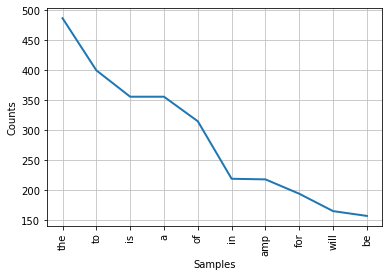

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [35]:
fdist.plot(10)

###    11) Removing stop words

In [39]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [40]:
stop_words = stopwords.words('english')
stop_words.append(stop)
stop_words.append('im')
stop_tokens = [word for word in text_tokens if not word in stop_words]
print(stop_tokens[0:100])

['alien', 'aacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'sent', 'agree', 'clubhouse', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'thanks', 'fixing', 'please', 'unlock', 'account', 'true', 'power', 'haha', 'crypto', 'wallet', 'wont', 'give', 'private', 'keys', 'avoided', 'costs', 'app', 'sucks', 'rt', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'gateway', 'together', 'one', 'mission', 'yes', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'starlink']


In [41]:
stop_text = ' '.join(stop_tokens)
stop_text

'alien aacarmack ray tracing cyberpunk hdr nextlevel tried great interview doge underestimated congratulations tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail haha thanks indeed tweets definitely represent realworld time allocation entertaining outcome likely sent agree clubhouse getting real bought dogecoin lil x toddler hodler definitely issues sentencing seems bit high thanks fixing please unlock account true power haha crypto wallet wont give private keys avoided costs app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission yes predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical amp economic endeavor however spacex needs pass deep chasm negative cash flow next year aacarmack lowest cost per ton carbon sequestered net value product made must scalable g meant price countries difference taxes amp shipping intended earth may ideas apply mars zpalmer x

In [42]:
fdist1 = FreqDist(stop_tokens)
fdist1.most_common(10)

[('amp', 218),
 ('rt', 127),
 ('tesla', 96),
 ('yes', 86),
 ('great', 76),
 ('haha', 55),
 ('good', 51),
 ('launch', 49),
 ('sure', 43),
 ('yeah', 41)]

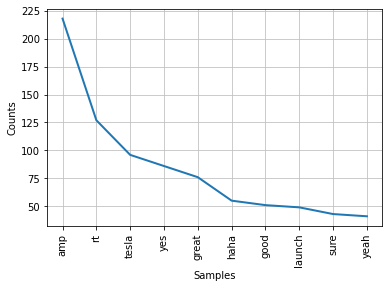

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [43]:
fdist1.plot(10)

###     12) Stemming

In [44]:
from nltk.stem import PorterStemmer

In [45]:
ps = PorterStemmer()
stem_tokens = [ps.stem(word) for word in stop_tokens]
print(stem_tokens[0:100]) 

['alien', 'aacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'tri', 'great', 'interview', 'doge', 'underestim', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'thought', 'would', 'fail', 'haha', 'thank', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'entertain', 'outcom', 'like', 'sent', 'agre', 'clubhous', 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'thank', 'fix', 'pleas', 'unlock', 'account', 'true', 'power', 'haha', 'crypto', 'wallet', 'wont', 'give', 'privat', 'key', 'avoid', 'cost', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavi', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'togeth', 'one', 'mission', 'ye', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'starlink']


###     13) Lemmatization

In [46]:
nlp = spacy.load('en_core_web_sm')   

In [47]:
lemmat = nlp(' '.join(stop_tokens))
print(lemmat[0:100]) 

alien aacarmack ray tracing cyberpunk hdr nextlevel tried great interview doge underestimated congratulations tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail haha thanks indeed tweets definitely represent realworld time allocation entertaining outcome likely sent agree clubhouse getting real bought dogecoin lil x toddler hodler definitely issues sentencing seems bit high thanks fixing please unlock account true power haha crypto wallet wont give private keys avoided costs app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission yes predict cash flow reasonably well starlink ipo


In [48]:
lemmas = [token.lemma_ for token in lemmat]
print(lemmas[0:100])

['alien', 'aacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'send', 'agree', 'clubhouse', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'true', 'power', 'haha', 'crypto', 'wallet', 'wo', 'nt', 'give', 'private', 'key', 'avoid', 'cost', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission', 'yes', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo']


In [49]:
lemmas_text = ' '.join(lemmas)
lemmas_text

'alien aacarmack ray tracing cyberpunk hdr nextlevel try great interview doge underestimate congratulation tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail haha thank indeed tweet definitely represent realworld time allocation entertaining outcome likely send agree clubhouse get real buy dogecoin lil x toddler hodler definitely issue sentencing seem bit high thank fix please unlock account true power haha crypto wallet wo nt give private key avoid cost app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission yes predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical amp economic endeavor however spacex need pass deep chasm negative cash flow next year aacarmack low cost per ton carbon sequester net value product make must scalable g mean price country difference taxis amp shipping intend earth may idea apply mar zpalmer xprize team manage 100 m carbon capture 

###   14) Generate Wordcloud

In [50]:
from wordcloud import WordCloud

In [51]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off"); 

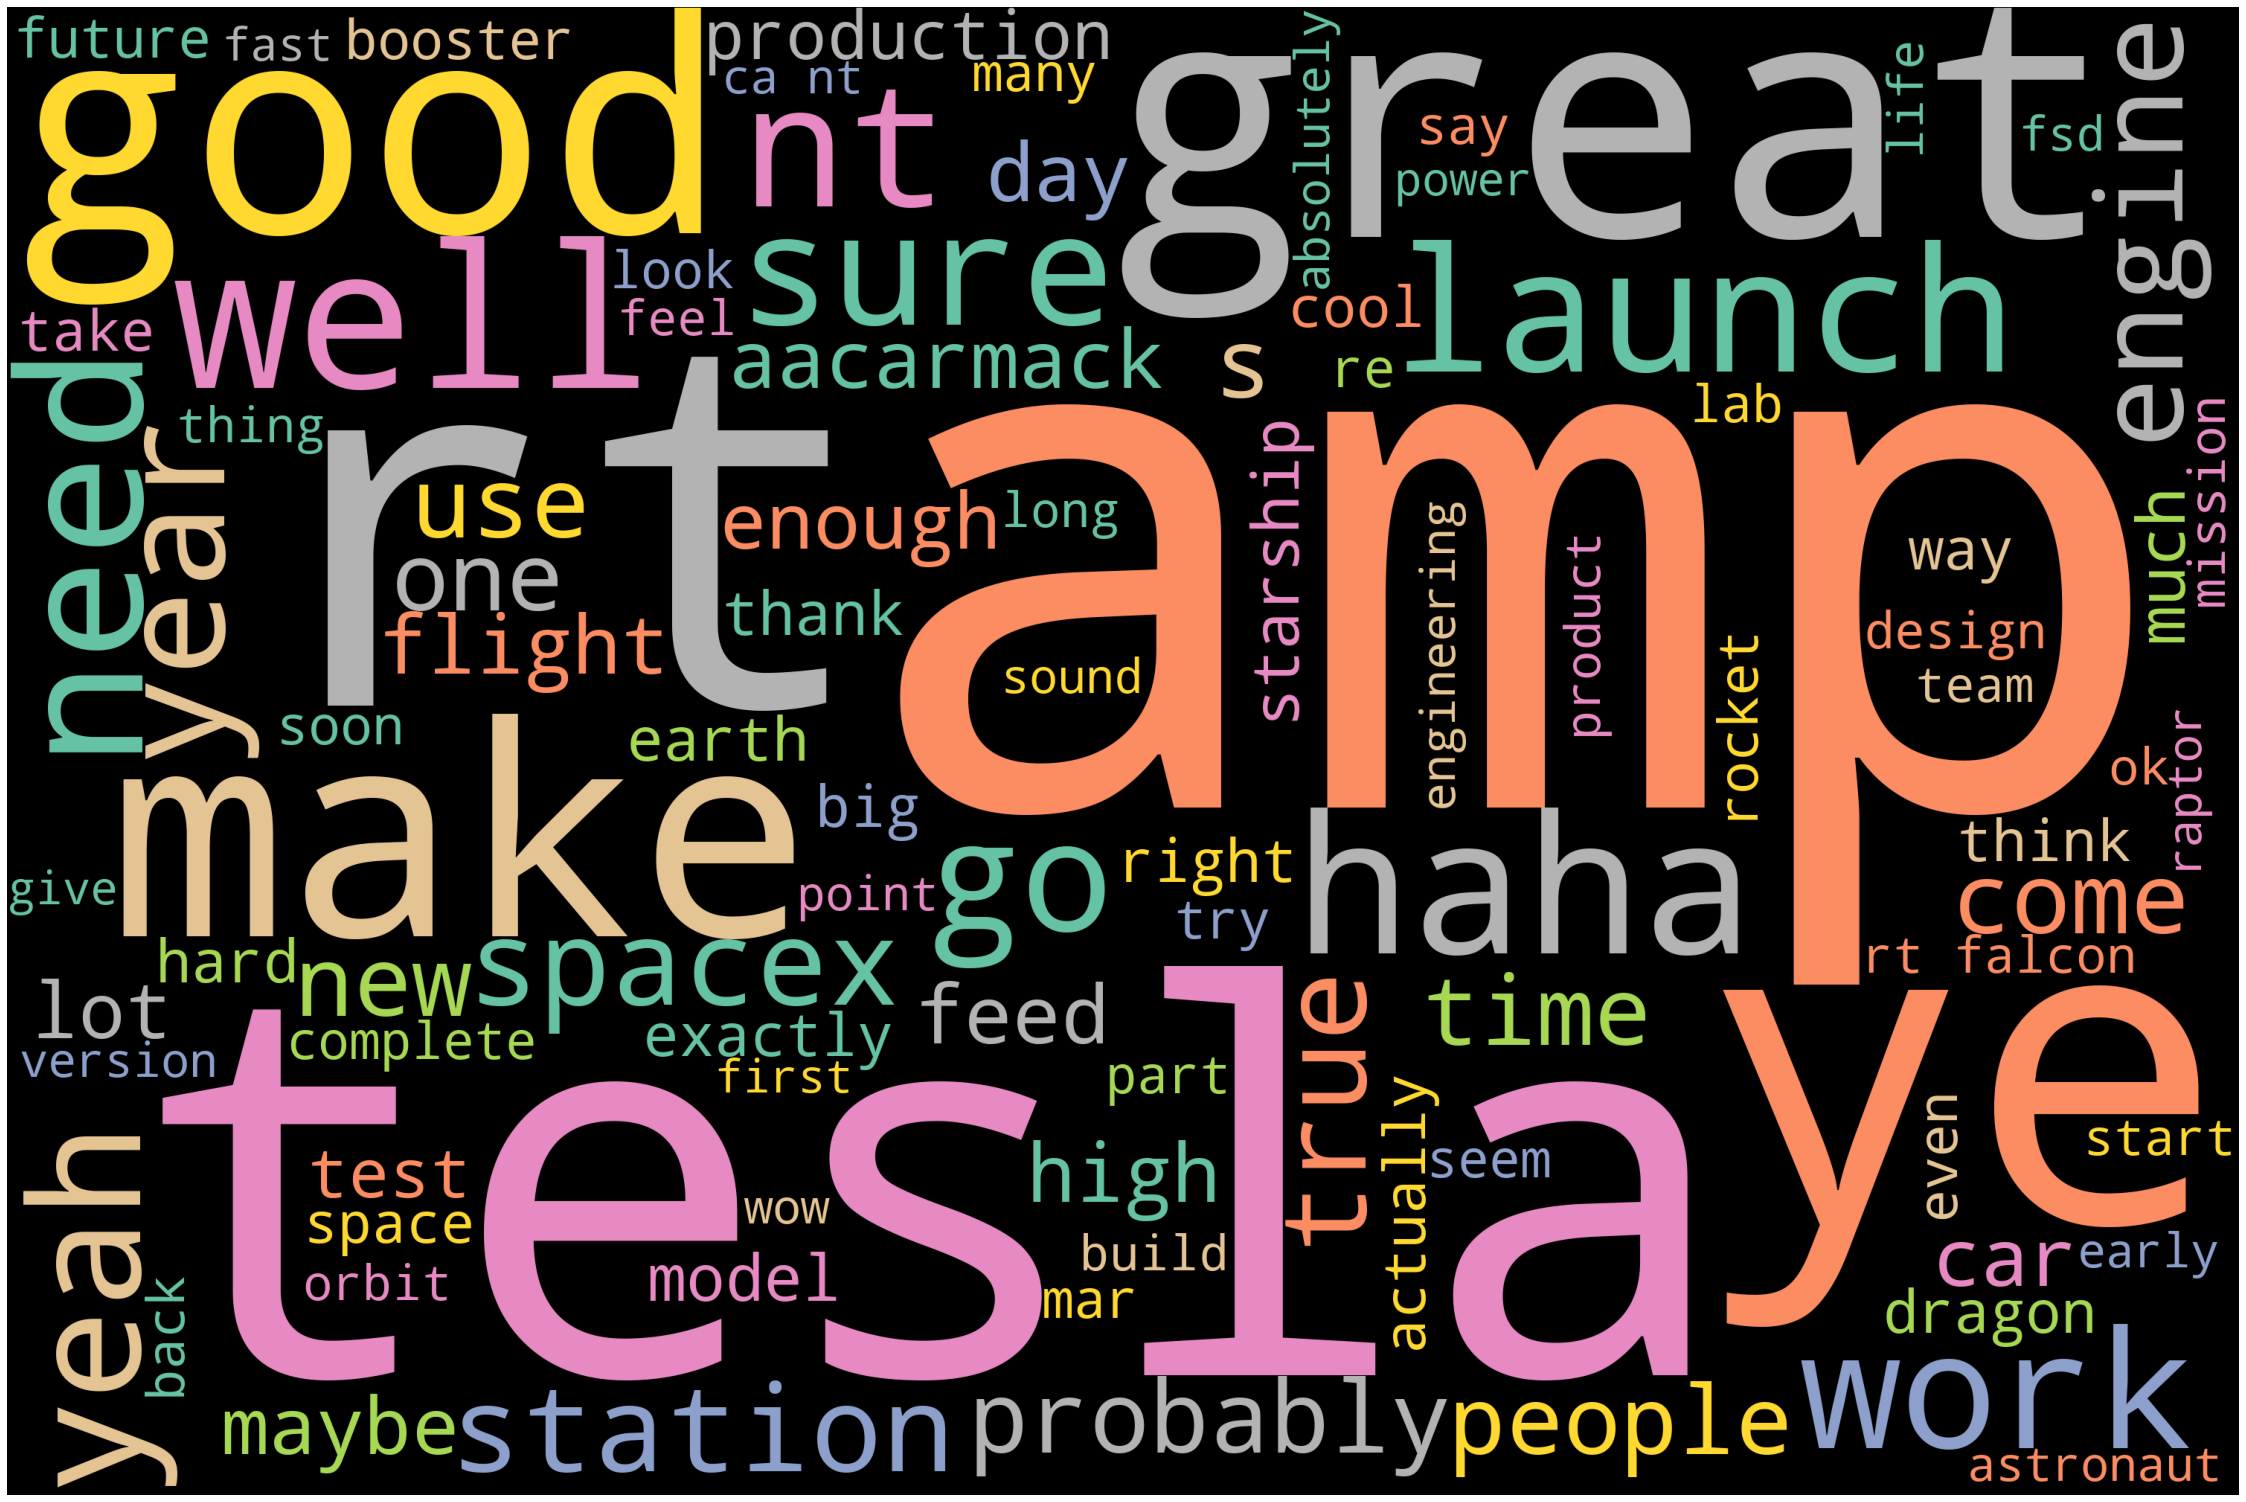

In [52]:
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', 
                      max_words=100,colormap='Set2').generate(lemmas_text)
plot_cloud(wordcloud)

###     15) POS Tagging

In [53]:
nlp = spacy.load('en_core_web_sm')
doc_block = nlp(lemmas_text)
spacy.displacy.render(doc_block, style='ent', jupyter=True) 

In [54]:
for token in doc_block[0:10]:
    print(token, token.pos_) 

alien ADJ
aacarmack NOUN
ray NOUN
tracing NOUN
cyberpunk NOUN
hdr NOUN
nextlevel NOUN
try VERB
great ADJ
interview NOUN


In [55]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[0:100]) 

['aacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'try', 'interview', 'doge', 'congratulation', 'tesla', 'china', 'execution', 'year', 'year', 'ox', 'frodo', 'thought', 'fail', 'thank', 'tweet', 'represent', 'realworld', 'time', 'allocation', 'outcome', 'send', 'agree', 'clubhouse', 'get', 'buy', 'dogecoin', 'lil', 'toddler', 'hodler', 'issue', 'sentencing', 'seem', 'bit', 'thank', 'fix', 'account', 'power', 'haha', 'crypto', 'wallet', 'give', 'avoid', 'cost', 'app', 'suck', 'nasa', 'falcon', 'launch', 'element', 'gateway', 'mission', 'predict', 'cash', 'flow', 'starlink', 'ipo', 'starlink', 'amp', 'endeavor', 'pass', 'cash', 'flow', 'year', 'aacarmack', 'cost', 'ton', 'carbon', 'sequester', 'value', 'product', 'make', 'scalable', 'price', 'country', 'difference', 'taxis', 'amp', 'shipping', 'intend', 'earth', 'apply', 'mar', 'zpalmer', 'xprize', 'team', 'manage', 'm', 'carbon', 'capture', 'prize', 'tesla', 'receive', 'stock', 'comp']


###     16)  Bag of Words 

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

In [57]:
cv = CountVectorizer()
count = cv.fit_transform(nouns_verbs)
sum_words = count.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']
wf_df

word  count
0            amp    210
1          tesla     89
2         launch     64
3           make     63
4           year     48
...          ...    ...
2360         aug      1
2361  propaganda      1
2362     samwise      1
2363      gamgee      1
2364       altho      1

[2365 rows x 2 columns]

##   Visualization of bag of words

<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

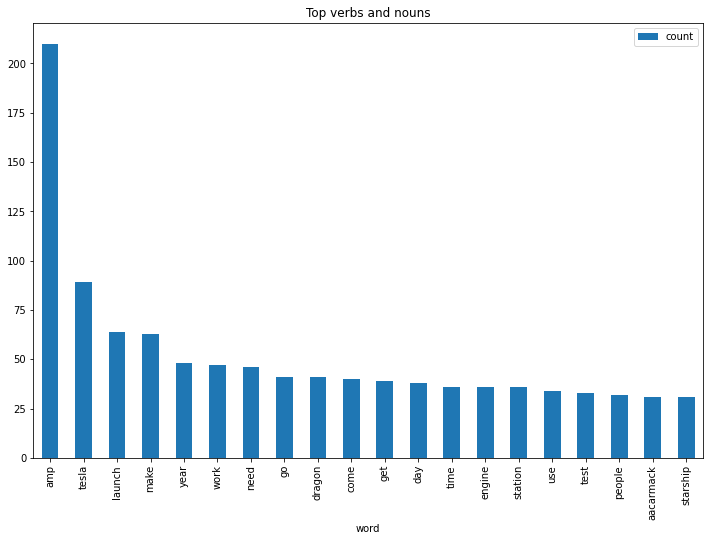

In [58]:
wf_df[0:20].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns') 

##    Sentimental Analysis

In [59]:
from nltk.tokenize import sent_tokenize
sent_tokens = sent_tokenize(spcl)
print(sent_tokens)

[' Im an alien _AA_Carmack Ray tracing on Cyberpunk with HDR is nextlevel.', 'Have you tried it?', 'Great interview!', 'Doge is underestimated  Congratulations Tesla China for amazing execution last year.', 'Now on to the next for even more!!', 'Happy New Year of the Ox!', 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.', '_   Haha thanks :)   Indeed!', 'Tweets definitely do not represent realworld time allocation.', 'The most entertaining outcome is the most likely  Just sent some Just agree to do Clubhouse with     Its getting real Bought some Dogecoin for lil X, so he can be a toddler hodler  He definitely has issues, but the sentencing seems a bit high  Thanks for fixing  Please unlock my account   This is true power haha   Any crypto wallet that wont give you your private keys should be avoided at all costs  Your app sucks RT : NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission!', 'Yes   _ Once w

In [60]:
elon = pd.DataFrame(sent_tokens, columns=['text'])
elon

text
0     Im an alien _AA_Carmack Ray tracing on Cyberp...
1                                   Have you tried it?
2                                     Great interview!
3    Doge is underestimated  Congratulations Tesla ...
4                   Now on to the next for even more!!
..                                                 ...
916  Not actually a payout, just a vesting of stock...
917  It may never pay out, as the stock cant b   No...
918                                    Details Aug 28.
919  AI symbiosis while u wait   Theres some of tha...
920  Samwise Gamgee  Altho Dumb and Dumber is  Prog...

[921 rows x 1 columns]

In [61]:
pos_neg = negative.append(positive).reset_index(drop=True)
pos_neg

0  values
0       abnormal      -1
1        abolish      -1
2     abominable      -1
3     abominably      -1
4      abominate      -1
...          ...     ...
6746    youthful       1
6747        zeal       1
6748      zenith       1
6749        zest       1
6750       zippy       1

[6751 rows x 2 columns]

In [62]:
pos_neg.columns = ["word",'values']
pos_neg

word  values
0       abnormal      -1
1        abolish      -1
2     abominable      -1
3     abominably      -1
4      abominate      -1
...          ...     ...
6746    youthful       1
6747        zeal       1
6748      zenith       1
6749        zest       1
6750       zippy       1

[6751 rows x 2 columns]

In [63]:
scores = pos_neg.set_index('word')['values'].to_dict()

In [64]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = scores
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [65]:
calculate_sentiment(text = 'affinity') 

1

###   Finding the sentimental values for text 

In [66]:
elon['sentiment_value'] = elon['text'].apply(calculate_sentiment) 
elon

text  sentiment_value
0     Im an alien _AA_Carmack Ray tracing on Cyberp...                0
1                                   Have you tried it?                0
2                                     Great interview!                1
3    Doge is underestimated  Congratulations Tesla ...                0
4                   Now on to the next for even more!!                0
..                                                 ...              ...
916  Not actually a payout, just a vesting of stock...                0
917  It may never pay out, as the stock cant b   No...               -1
918                                    Details Aug 28.                0
919  AI symbiosis while u wait   Theres some of tha...                0
920  Samwise Gamgee  Altho Dumb and Dumber is  Prog...                0

[921 rows x 2 columns]

In [67]:
elon['word_count'] = elon['text'].str.split().apply(len)
elon['word_count'].head(10) 

0    12
1     4
2     2
3    11
4     8
5     6
6    13
7     5
8     8
9    96
Name: word_count, dtype: int64

In [68]:
elon

text  sentiment_value  \
0     Im an alien _AA_Carmack Ray tracing on Cyberp...                0   
1                                   Have you tried it?                0   
2                                     Great interview!                1   
3    Doge is underestimated  Congratulations Tesla ...                0   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
916  Not actually a payout, just a vesting of stock...                0   
917  It may never pay out, as the stock cant b   No...               -1   
918                                    Details Aug 28.                0   
919  AI symbiosis while u wait   Theres some of tha...                0   
920  Samwise Gamgee  Altho Dumb and Dumber is  Prog...                0   

     word_count  
0            12  
1             4  
2             2  
3            11  
4             8  
..          ...  
916          10  
917          29  
918           3  
919          42  
920          11  

[921 rows x 3 columns]

In [69]:
elon.sort_values(by='sentiment_value').tail(10)

text  sentiment_value  \
717  We just havent observed the  _sci Pretty much ...                4   
348  I strive to ensure that the companies enable  ...                4   
347  Luck is the best superpower RT : Thank you to ...                4   
299  It was designed from the beginning with human ...                5   
579  T   Fine, well do it already    Good analysis,...                6   
105  Was also thinking that SpaceX Boca should hold...                6   
371  _Hurley   Stop being a chad _Hurley   Uh  Chad...                6   
569  Haha true  Maybe I will    Jets are so cool   ...                6   
36   Yes, but engines have a min throttle point whe...                7   
651  Its not useful for predicting the future, nor ...               11   

     word_count  
717          54  
348          21  
347          39  
299          64  
579          32  
105          78  
371          53  
569          48  
36          203  
651          95

In [70]:
elon['sentiment_value'].describe() 

count    921.000000
mean       0.479913
std        1.289539
min       -5.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       11.000000
Name: sentiment_value, dtype: float64

###   Sentiment value less than zero

In [131]:
elon[elon['sentiment_value']<0].tail()

text  sentiment_value  \
896  A rocket that is single use is just as absurd ...               -1   
898                         Were being extra paranoid.               -1   
903  Extreme     We have reduced pricing on Model Y...               -1   
915  Everything weve ever sensed or thought has bee...               -1   
917  It may never pay out, as the stock cant b   No...               -1   

     word_count  
896          15  
898           4  
903          55  
915          14  
917          29

###   Sentiment value greater than zero

In [84]:
elon[elon['sentiment_value']>0].head()

text  sentiment_value  \
2                                    Great interview!                1   
5                           Happy New Year of the Ox!                1   
10  Yes   _ Once we can predict cash flow reasonab...                1   
14  This is intended for Earth, but there may be s...                1   
17  Back to work I go    Does seem a bit high  Dog...                1   

    word_count  
2            2  
5            6  
10          23  
14          31  
17          31

###   Sentiment value equal to zero

In [86]:
elon[elon['sentiment_value']==0].head()

text  sentiment_value  \
0   Im an alien _AA_Carmack Ray tracing on Cyberp...                0   
1                                 Have you tried it?                0   
3  Doge is underestimated  Congratulations Tesla ...                0   
4                 Now on to the next for even more!!                0   
7                       _   Haha thanks :)   Indeed!                0   

   word_count  
0          12  
1           4  
3          11  
4           8  
7           5

###   Visualizing the sentimental values 

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

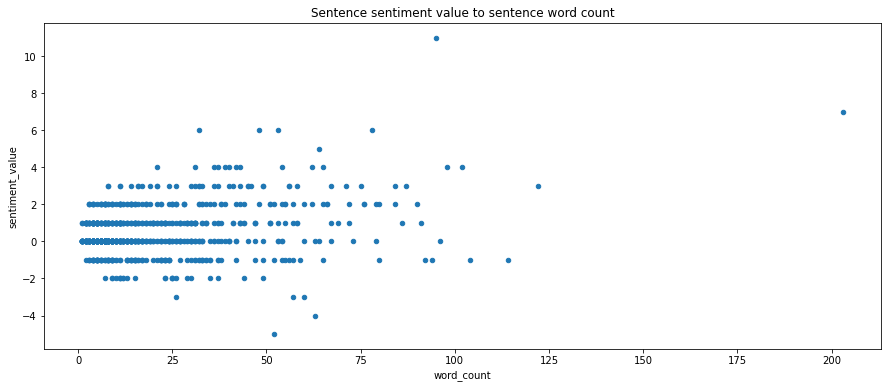

In [87]:
elon.plot.scatter(x='word_count', y='sentiment_value', figsize=(15,6),title='Sentence sentiment value to sentence word count')

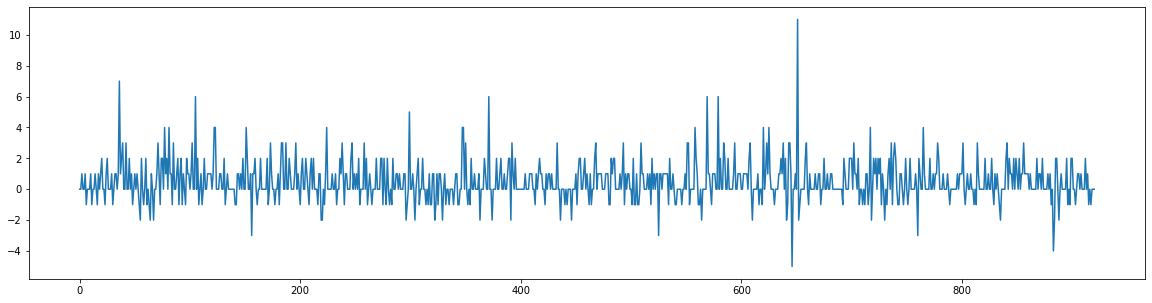

In [88]:
plt.figure(figsize=(20,5))
plt.plot(elon['sentiment_value']) 

(array([  2.,  26., 107., 633.,  96.,  50.,   5.,   1.,   0.,   1.]),
 array([-5. , -3.4, -1.8, -0.2,  1.4,  3. ,  4.6,  6.2,  7.8,  9.4, 11. ]),
 <BarContainer object of 10 artists>)

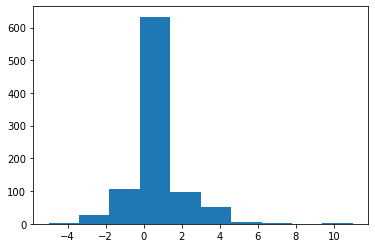

In [89]:
plt.hist(elon['sentiment_value']) 

###    From the above plots we can infer that the inclination is more towards positive but most of the tweets are neural 

###   Positive Wordcloud 

####   finding the positive words in the text

In [117]:
token = lemmas_text.split()

In [118]:
positive_word = " ".join(positive[0]).split()
pos_word = " ".join(w for w in token if w in positive_word)

In [119]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off"); 

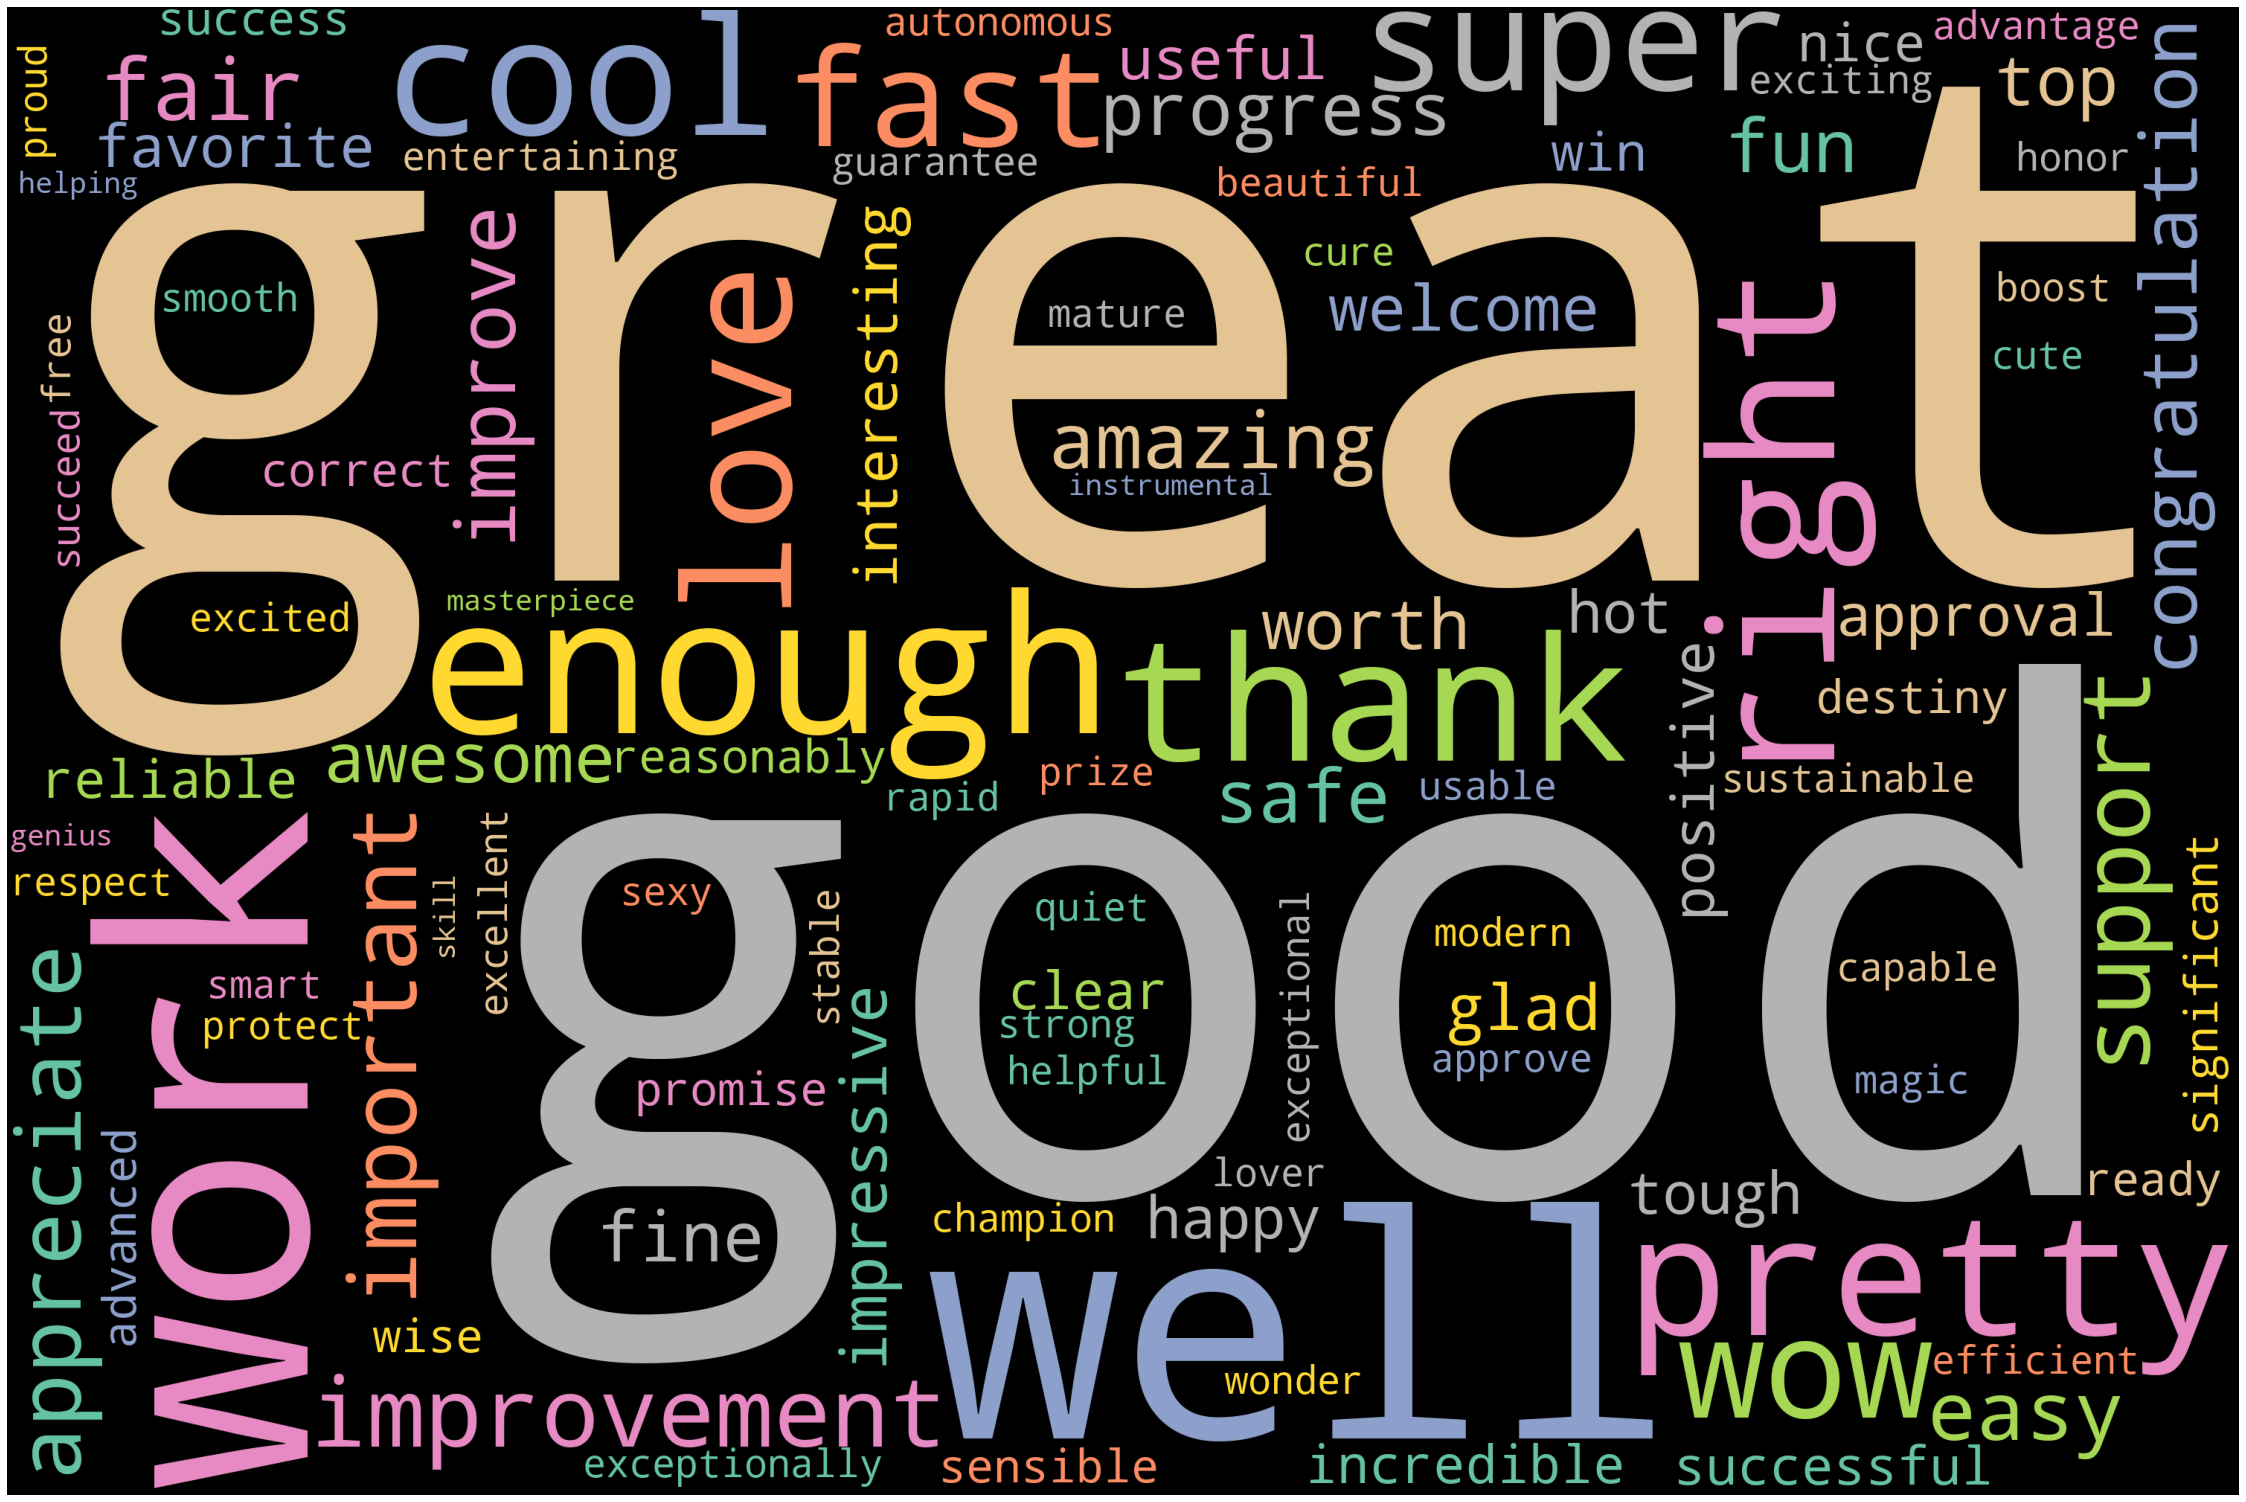

In [120]:
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', 
                      max_words=100,colormap='Set2').generate(pos_word)
plot_cloud(wordcloud)

###    Negative Word

####  finding the negative words in the text

In [125]:
negative_word = " ".join(negative[0]).split()
neg_word = " ".join(word for word in token if word in negative_word)

In [126]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off"); 

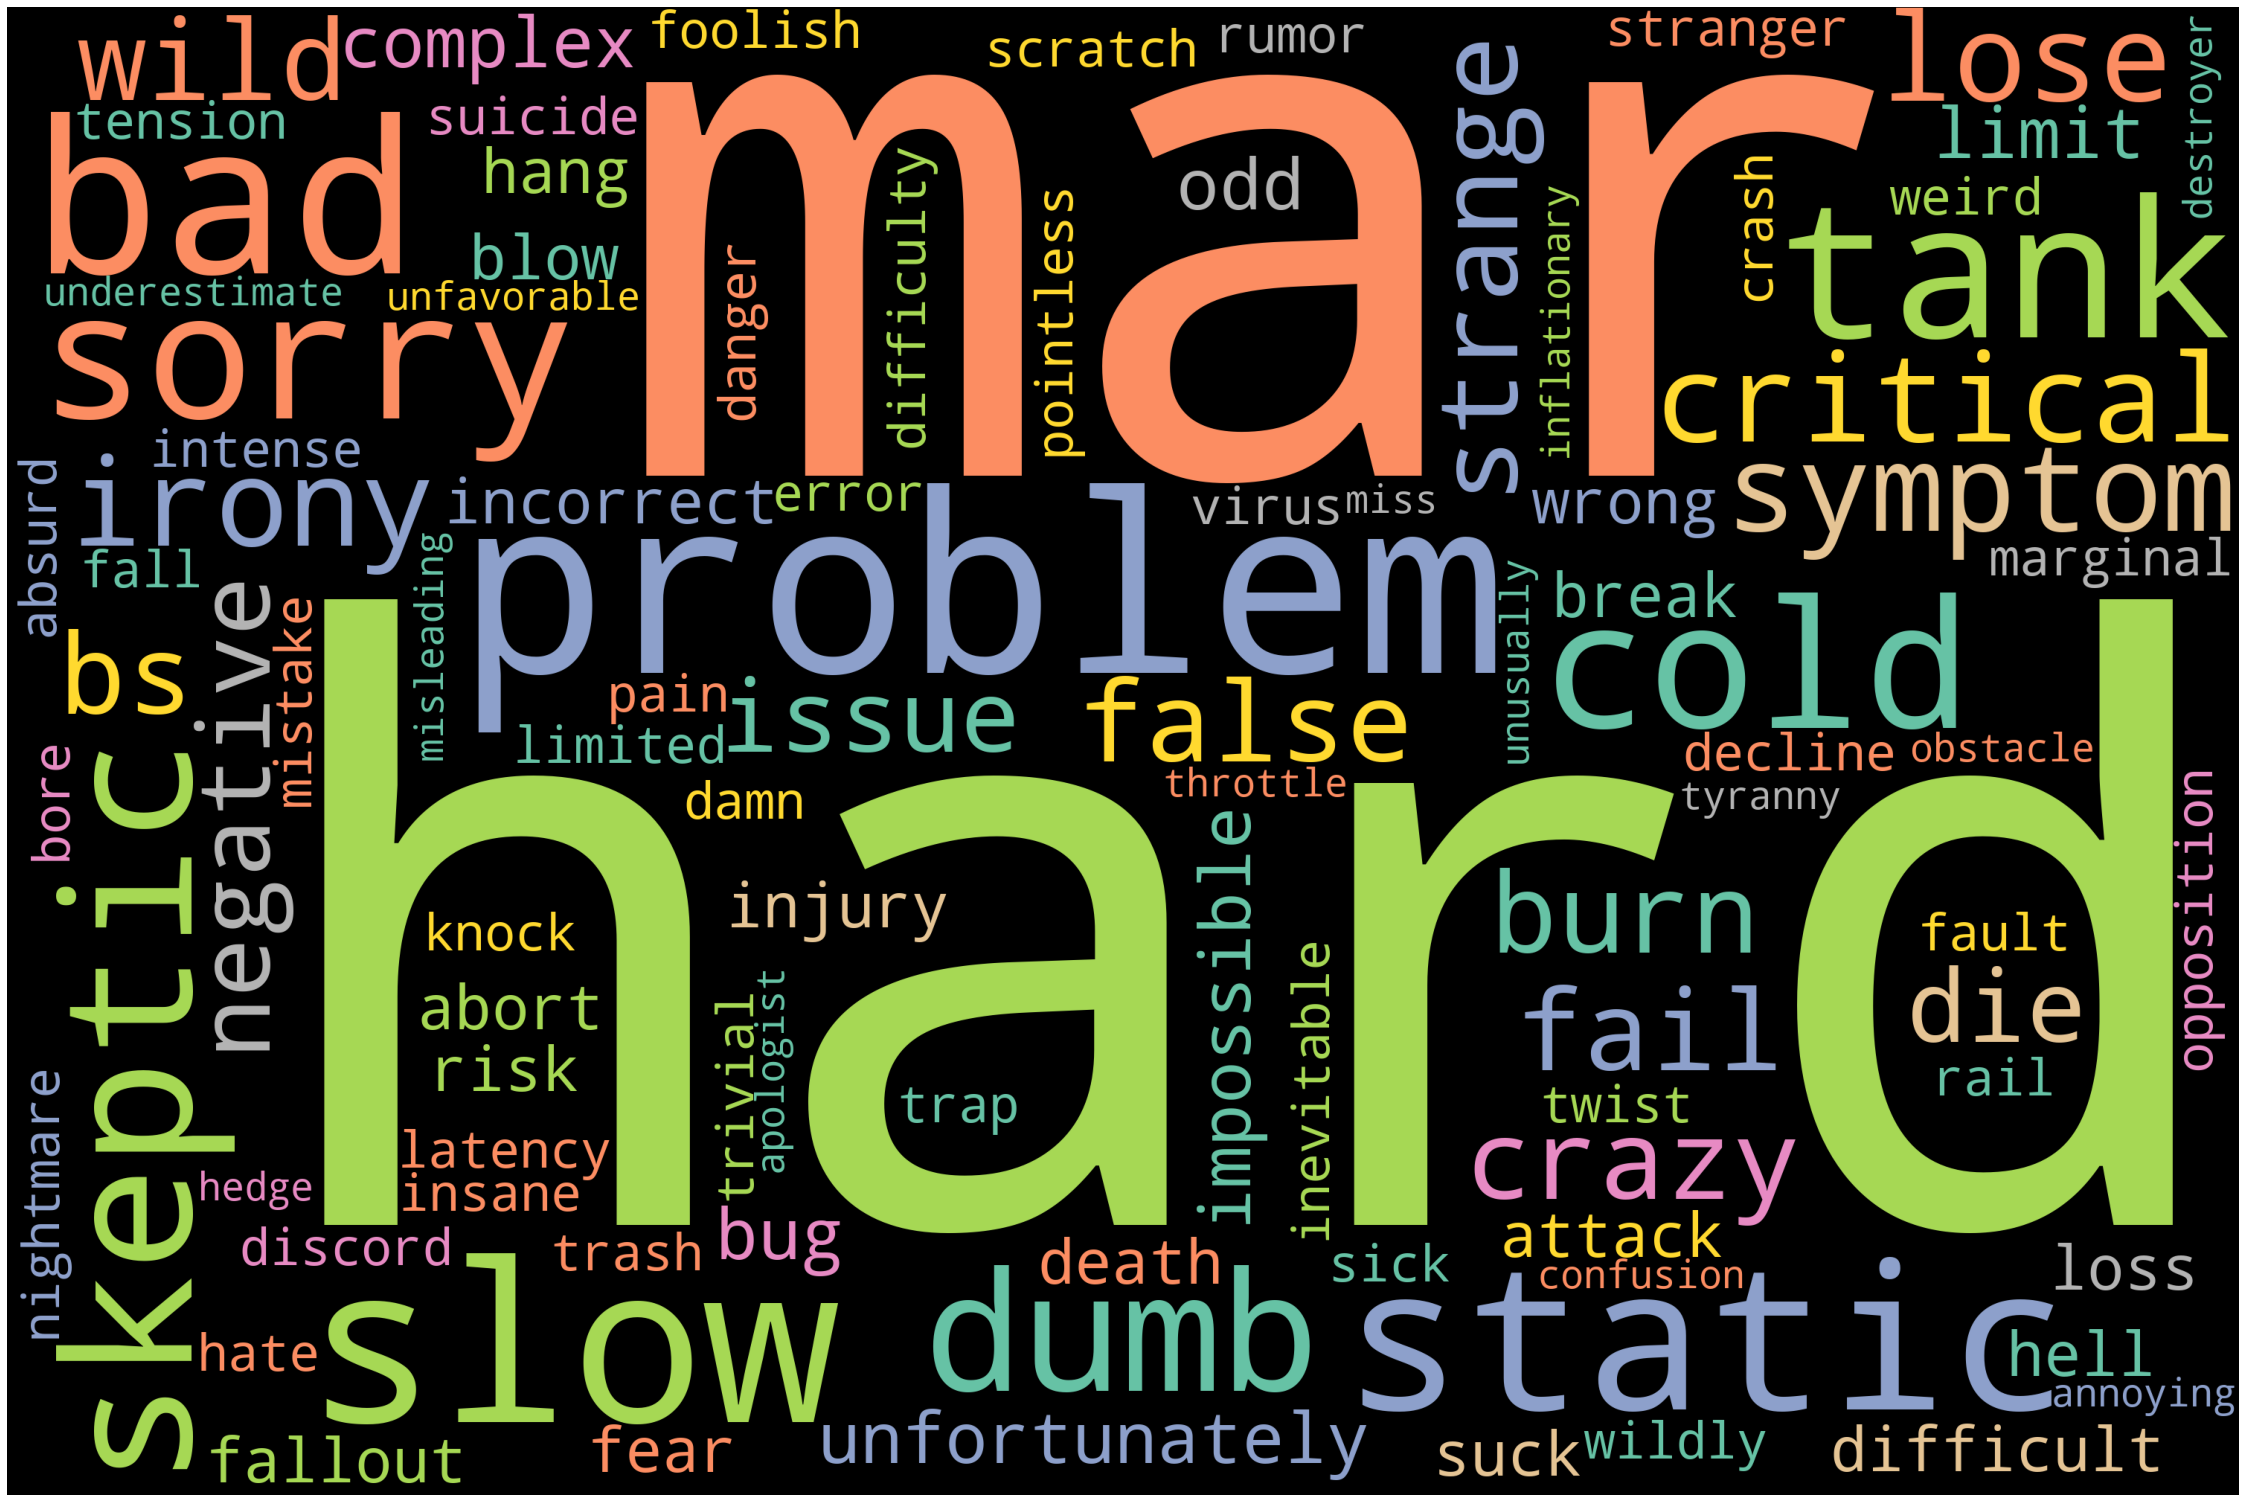

In [127]:
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', 
                      max_words=100,colormap='Set2').generate(neg_word)
plot_cloud(wordcloud)

###   Percentage of positive and negative words

In [128]:
len(pos_word), len(neg_word), len(token)

(6236, 3196, 11305)

In [129]:
len(pos_word)/len(token)

0.5516143299425034

In [130]:
len(neg_word)/len(token)

0.28270676691729324

###  So from the wordcloud we can say that the elon musk tweets are positive 